# Setup

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import metrics

# TODo remove when package is updated
import sys,os
sys.path.append(os.path.expanduser('~/imodels'))

# installable with: `pip install imodels`
import imodels
from imodels import FIGSClassifier
import demo_helper
np.random.seed(13)

Let's start by loading some data in...  
Note, we need to still load the reg dataset first to get the same splits as in `imodels_demo.ipynb` due to the call to random

In [2]:
# ames housing dataset: https://www.openml.org/search?type=data&status=active&id=43926
X_train_reg, X_test_reg, y_train_reg, y_test_reg, feat_names_reg = demo_helper.get_ames_data()

# diabetes dataset: https://www.openml.org/search?type=data&sort=runs&id=37&status=active
X_train, X_test, y_train, y_test, feat_names = demo_helper.get_diabetes_data()
    # feat_names meanings:
    # ["#Pregnant", "Glucose concentration test", "Blood pressure(mmHg)",
    # "Triceps skin fold thickness(mm)",
    # "2-Hour serum insulin (mu U/ml)", "Body mass index", "Diabetes pedigree function", "Age (years)"]

# load some data
# print('Regression data training', X_train_reg.shape, 'Classification data training', X_train.shape)

***
# FIGS

In [3]:
model_figs = FIGSClassifier(max_rules=7)

In [4]:
import imodels
# specify a decision tree with a maximum depth
model_figs.fit(X_train, y_train, feature_names=feat_names);

In [5]:
print(model_figs)

> ------------------------------
> FIGS-Fast Interpretable Greedy-Tree Sums:
> 	Predictions are made by summing the "Val" reached by traversing each tree.
> 	For classifiers, a sigmoid function is then applied to the sum.
> ------------------------------
Glucose concentration test <= 99.500 (Tree #0 root)
	Val: 0.068 (leaf)
	Glucose concentration test <= 168.500 (split)
		#Pregnant <= 6.500 (split)
			Body mass index <= 30.850 (split)
				Val: 0.065 (leaf)
				Blood pressure(mmHg) <= 67.000 (split)
					Val: 0.705 (leaf)
					Val: 0.303 (leaf)
			Val: 0.639 (leaf)
		Blood pressure(mmHg) <= 93.000 (split)
			Val: 0.860 (leaf)
			Val: -0.009 (leaf)

	+
Diabetes pedigree function <= 0.404 (Tree #1 root)
	Val: -0.088 (leaf)
	Val: 0.106 (leaf)



In [6]:
print(model_figs.print_tree(X_train, y_train))

------------
Glucose concentration test <= 99.500 65/192 (33.85%)
	ΔRisk = 0.07 4/59 (6.78%)
	Glucose concentration test <= 168.500 61/133 (45.86%)
		#Pregnant <= 6.500 44/112 (39.29%)
			Body mass index <= 30.850 21/76 (27.63%)
				ΔRisk = 0.06 2/31 (6.45%)
				Blood pressure(mmHg) <= 67.000 19/45 (42.22%)
					ΔRisk = 0.71 10/14 (71.43%)
					ΔRisk = 0.30 9/31 (29.03%)
			ΔRisk = 0.64 23/36 (63.89%)
		Blood pressure(mmHg) <= 93.000 17/21 (80.95%)
			ΔRisk = 0.86 17/19 (89.47%)
			ΔRisk = -0.01 0/2 (0.0%)

	+
Diabetes pedigree function <= 0.404 65/192 (33.85%)
	ΔRisk = -0.09 25/105 (23.81%)
	ΔRisk = 0.11 40/87 (45.98%)



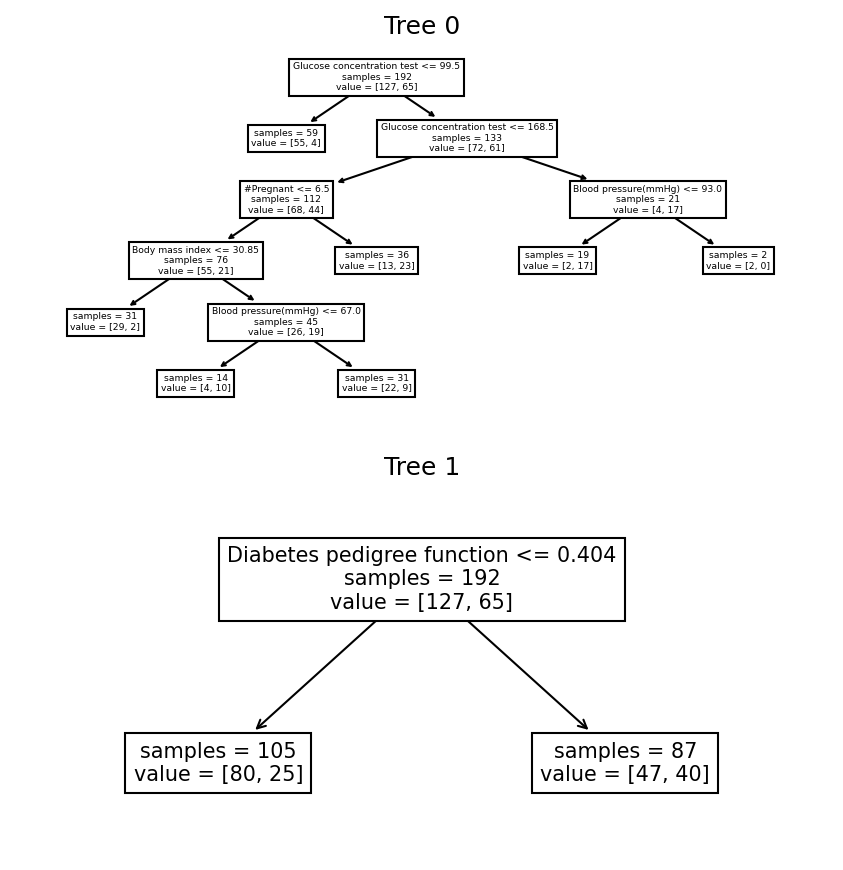

In [7]:
model_figs.plot(fig_size=7)

***
# Gini Importance

In [8]:
def print_node(node):
    print(f'node_id: {node.node_id}, left.node_id: {node.left.node_id if node.left is not None else None}, right.node_id: {node.right.node_id if node.right is not None else None}, impurity: {node.impurity}'
    )
    if node.left is None:
        return
    print_node(node.left)
    print_node(node.right)

In [9]:
print_node(model_figs.trees_[0])

node_id: 0, left.node_id: 1, right.node_id: 2, impurity: 0.2239312065972222
node_id: 1, left.node_id: None, right.node_id: None, impurity: 0.06266390252493441
node_id: 2, left.node_id: 3, right.node_id: 10, impurity: 0.24828989767652213
node_id: 3, left.node_id: 4, right.node_id: 9, impurity: 0.2385204081632653
node_id: 4, left.node_id: 5, right.node_id: 6, impurity: 0.19996537396121883
node_id: 5, left.node_id: None, right.node_id: None, impurity: 0.05835740239092969
node_id: 6, left.node_id: 7, right.node_id: 8, impurity: 0.22746927997708863
node_id: 7, left.node_id: None, right.node_id: None, impurity: 0.21345881926419968
node_id: 8, left.node_id: None, right.node_id: None, impurity: 0.18349552685909915
node_id: 9, left.node_id: None, right.node_id: None, impurity: 0.20306481853610409
node_id: 10, left.node_id: 11, right.node_id: 12, impurity: 0.15425731212223304
node_id: 11, left.node_id: None, right.node_id: None, impurity: 0.09754575404204457
node_id: 12, left.node_id: None, righ

In [10]:
print_node(model_figs.trees_[1])

node_id: 0, left.node_id: 1, right.node_id: 2, impurity: 0.14646463475357333
node_id: 1, left.node_id: None, right.node_id: None, impurity: 0.10869124902810302
node_id: 2, left.node_id: None, right.node_id: None, impurity: 0.13755729196848063


In [11]:
model_figs.importance_data_

[array([0.00726526, 0.01613805, 0.0050546 , 0.        , 0.        ,
        0.00544416, 0.        , 0.        ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02469346, 0.        ])]

In [12]:
model_figs.feature_importances_

array([0.12398995, 0.27541438, 0.08626253, 0.        , 0.        ,
       0.09291092, 0.42142223, 0.        ])

In [13]:
sum(model_figs.feature_importances_)

1.0

In [14]:
dfp_importance = pd.DataFrame({'feat_names': feat_names})
dfp_importance['feature'] = dfp_importance.index
dfp_importance_gini = pd.DataFrame({'importance_gini': model_figs.feature_importances_})
dfp_importance_gini['feature'] = dfp_importance_gini.index
dfp_importance_gini['importance_gini_pct'] = dfp_importance_gini['importance_gini'].rank(pct=True)
dfp_importance = pd.merge(dfp_importance, dfp_importance_gini, on='feature', how='left')
dfp_importance = dfp_importance.sort_values(by=['importance_gini', 'feature'], ascending=[False, True]).reset_index(drop=True)
display(dfp_importance)

,feat_names,feature,importance_gini,importance_gini_pct
0,Diabetes pedigree function,6,0.421422,1.000
1,Glucose concentration test,1,0.275414,0.875
2,#Pregnant,0,0.123990,0.750
3,Body mass index,5,0.092911,0.625
4,Blood pressure(mmHg),2,0.086263,0.500
5,Triceps skin fold thickness(mm),3,0.000000,0.250
6,2-Hour serum insulin (mu U/ml),4,0.000000,0.250
7,Age (years),7,0.000000,0.250


***
# `dtreeviz` Integration
One tree at a time only, showing tree 0 here

In [15]:
from dtreeviz import trees
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from imodels.tree.viz_utils import extract_sklearn_tree_from_figs

dt = extract_sklearn_tree_from_figs(model_figs, tree_num=0, n_classes=2)
shadow_dtree = ShadowSKDTree(dt, X_train, y_train, feat_names, 'y', [0, 1])

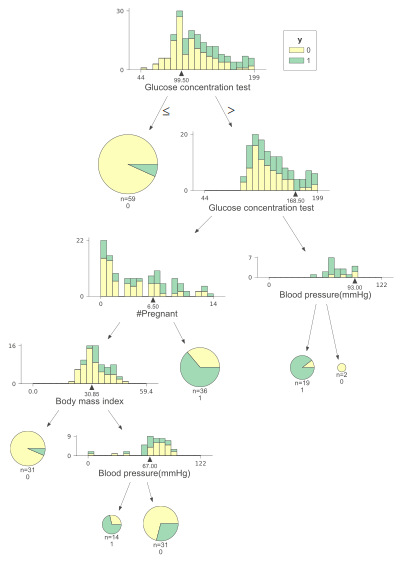

In [16]:
trees.dtreeviz(shadow_dtree)

In [17]:
x_example = X_train[13]

In [18]:
list(zip(feat_names,x_example))

[('#Pregnant', 0.0),
 ('Glucose concentration test', 131.0),
 ('Blood pressure(mmHg)', 88.0),
 ('Triceps skin fold thickness(mm)', 0.0),
 ('2-Hour serum insulin (mu U/ml)', 0.0),
 ('Body mass index', 31.6),
 ('Diabetes pedigree function', 0.743),
 ('Age (years)', 32.0)]

In [19]:
print(trees.explain_prediction_path(shadow_dtree, x=x_example, explanation_type='plain_english'))

#Pregnant < 6.5
99.5 <= Glucose concentration test  < 168.5
67.0 <= Blood pressure(mmHg) 
30.85 <= Body mass index 



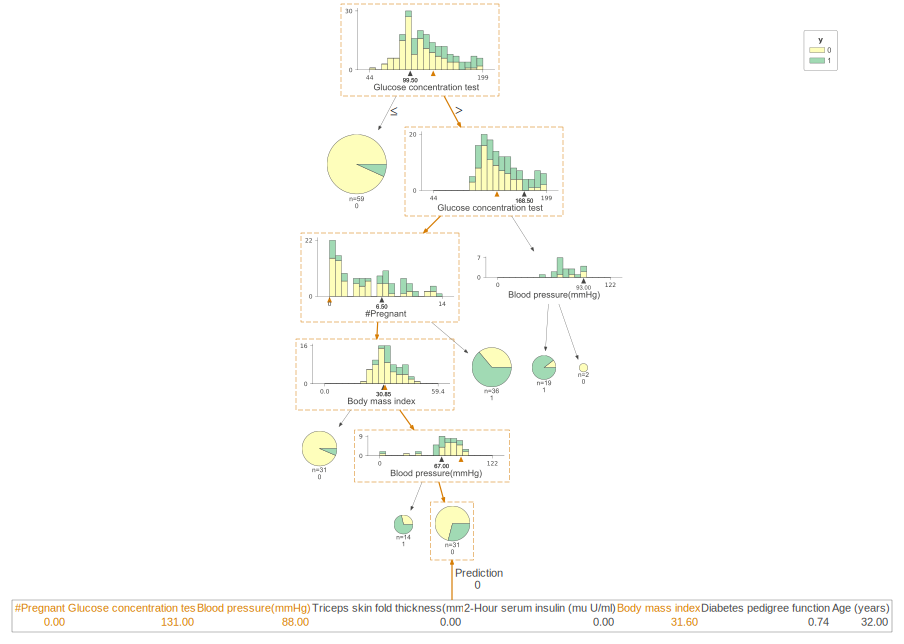

In [20]:
trees.dtreeviz(shadow_dtree, X=x_example)

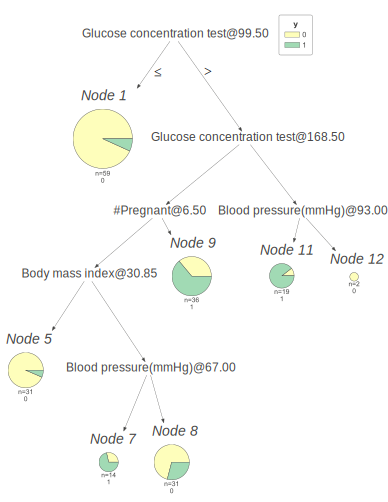

In [21]:
trees.dtreeviz(shadow_dtree, show_node_labels=True, fancy=False)

In [22]:
trees.describe_node_sample(shadow_dtree, node_id=8)

,#Pregnant,Glucose concentration test,Blood pressure(mmHg),Triceps skin fold thickness(mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age (years)
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1.935484,128.806458,79.258064,27.354839,115.580643,37.654842,0.460129,30.935484
std,2.112431,19.927233,7.554106,18.890118,109.674606,4.851518,0.266261,9.113855
min,0.000000,100.000000,68.000000,0.000000,0.000000,31.200001,0.167000,21.000000
25%,0.000000,113.000000,73.000000,0.000000,0.000000,33.650000,0.252500,26.000000
50%,1.000000,126.000000,78.000000,37.000000,105.000000,36.400002,0.337000,28.000000
75%,3.000000,146.500000,85.500000,41.500000,225.000000,41.900000,0.703500,32.500000
max,6.000000,165.000000,94.000000,54.000000,310.000000,47.900002,1.076000,65.000000


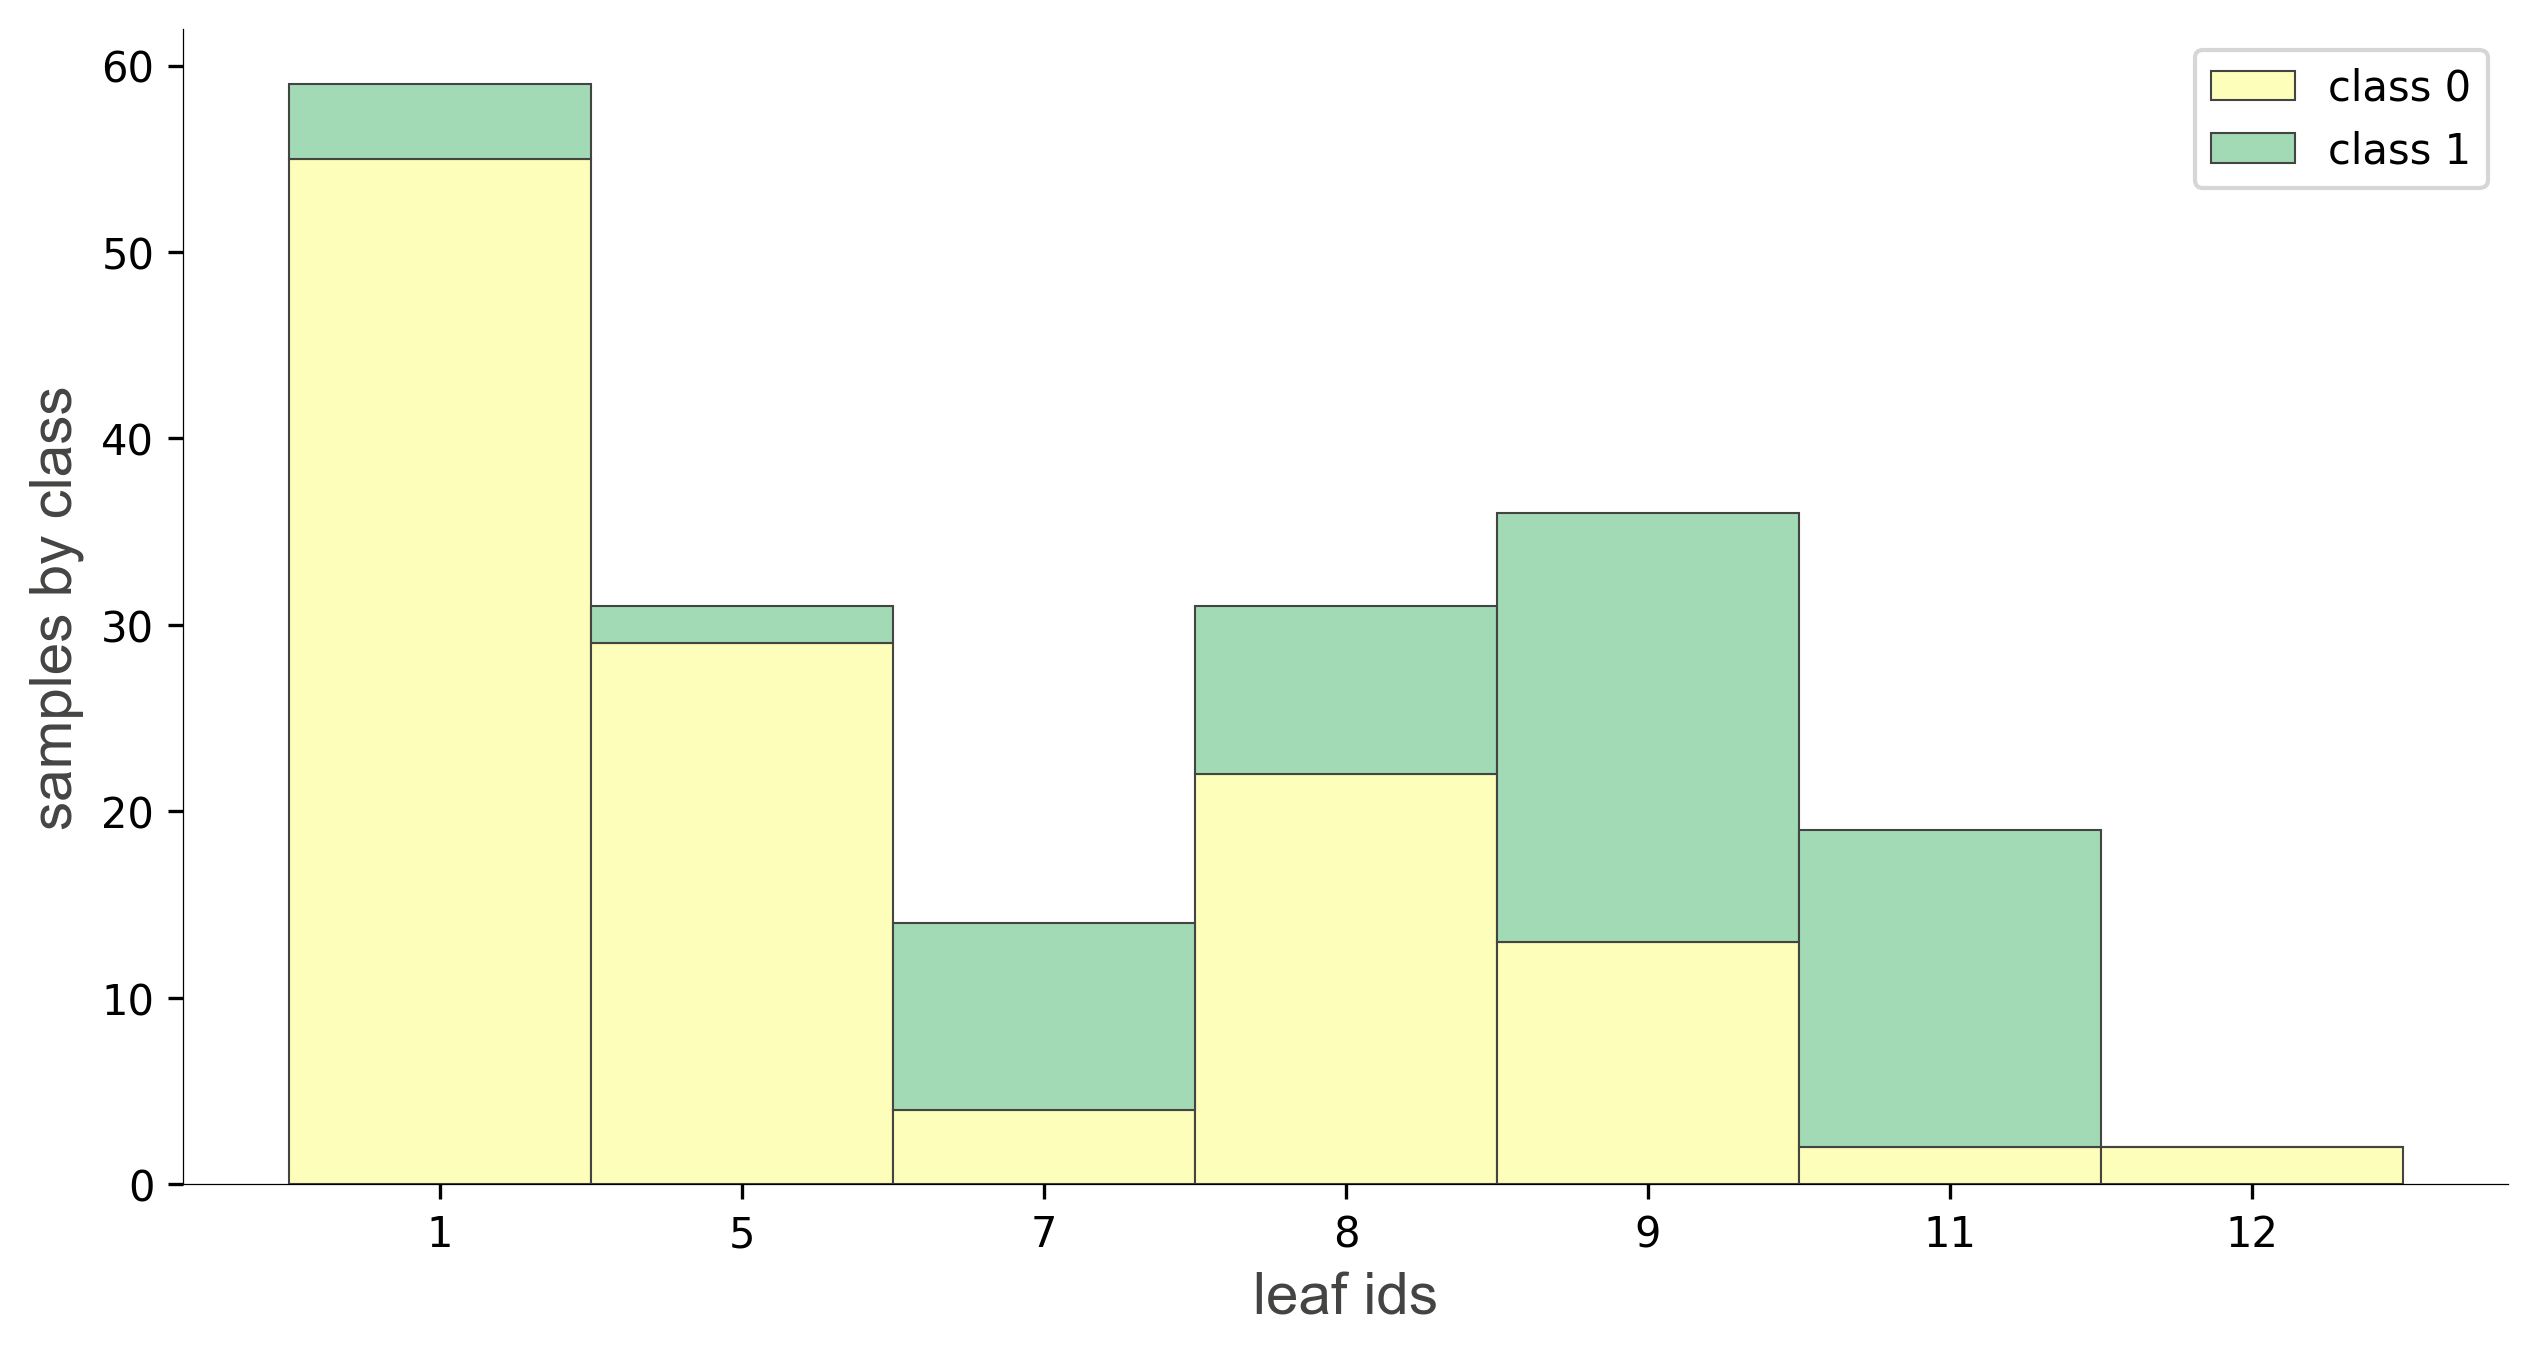

In [23]:
trees.ctreeviz_leaf_samples(shadow_dtree)

***
# `SKompiler` Integration
One tree at a time only, showing tree 0 here

In [24]:
from skompiler import skompile
from imodels.tree.viz_utils import extract_sklearn_tree_from_figs

dt = extract_sklearn_tree_from_figs(model_figs, tree_num=0, n_classes=2)
expr = skompile(dt.predict_proba, feat_names)

In [25]:
print(expr.to('sqlalchemy/sqlite', component=1, assign_to='tree_0'))

SELECT CASE WHEN ("Glucose concentration test" <= 99.5) THEN 0.06779661016949153 ELSE CASE WHEN ("Glucose concentration test" <= 168.5) THEN CASE WHEN ("#Pregnant" <= 6.5) THEN CASE WHEN ("Body mass index" <= 30.84999942779541) THEN 0.06451612903225806 ELSE CASE WHEN ("Blood pressure(mmHg)" <= 67.0) THEN 0.7142857142857143 ELSE 0.2903225806451613 END END ELSE 0.6388888888888888 END ELSE CASE WHEN ("Blood pressure(mmHg)" <= 93.0) THEN 0.8947368421052632 ELSE 0.0 END END END AS tree_0 
FROM data


In [26]:
print(expr.to('python/code'))

(np.array([0.9322033898305084, 0.06779661016949153]) if 
    Glucose concentration test <= 99.5 else ((np.array([
    0.9354838709677419, 0.06451612903225806]) if Body mass index <= 
    30.84999942779541 else np.array([0.2857142857142857, 
    0.7142857142857143]) if Blood pressure(mmHg) <= 67.0 else np.array(
    [0.7096774193548387, 0.2903225806451613])) if #Pregnant <= 6.5 else
    np.array([0.3611111111111111, 0.6388888888888888])) if 
    Glucose concentration test <= 168.5 else np.array([
    0.10526315789473684, 0.8947368421052632]) if Blood pressure(mmHg) <= 
    93.0 else np.array([1.0, 0.0]))

